In [1]:
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import glob
from netCDF4 import Dataset
import copy
import gc
import ant_plus

import os
import sys
sys.path.insert(0, '/Users/h/Github/geo_data_group/')
import grid_set as gs

In [2]:
! ls LRM-SAR-SIN_comb/All*.nc

LRM-SAR-SIN_comb/All_modes_SLA_bin_20190101-20190131.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190201-20190228.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190301-20190331.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190401-20190430.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190501-20190531.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190601-20190630.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190701-20190731.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190801-20190831.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190901-20190930.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20191001-20191030.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20191101-20191130.nc
LRM-SAR-SIN_comb/All_modes_SLA_bin_20191201-20191231.nc


In [3]:
flist = glob.glob('LRM-SAR-SIN_comb/All_modes_SLA_bin_*.nc')
flist.sort()

In [4]:
FIG_DIR = 'LRM-SAR-SIN_comb/All_modes_SLA_bin_20190901-20190930/'

In [5]:
#$### map projection
m = ccrs.SouthPolarStereo()
proj_cart = ccrs.PlateCarree() 
f = plt.figure()
G= gs.grid_set(m)

ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
G.set_grid_dxy(100e3,100e3,ax)
plt.close()


Got a grid res =  93  x  93
Note that all grid info is in nx x ny grids, whilst data is in nx x ny


In [8]:
Acl_list = []
for f in flist:
    class Acl:
        pass
    Acl = Acl
    #### date
    Acl.date = dt.datetime.strptime(f.split('SLA_bin_')[1].split('-')[0],'%Y%m%d')
    print(f)
    f_nc = Dataset(f)
    kn = 0
    Acl.vars=[]
    for k in f_nc.variables.keys():
        setattr(Acl,k,f_nc.variables[k][:])
        attr_add = ant_plus.add_ncattr(f_nc.variables[k])
        setattr(Acl,k+'_attr',attr_add)
        kn+=1
        Acl.vars.append(k)
    Acl_list.append(Acl)
    print(kn)
    f_nc.close()

LRM-SAR-SIN_comb/All_modes_SLA_bin_20190101-20190131.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190201-20190228.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190301-20190331.nc
67
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190401-20190430.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190501-20190531.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190601-20190630.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190701-20190731.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190801-20190831.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20190901-20190930.nc
67
LRM-SAR-SIN_comb/All_modes_SLA_bin_20191001-20191030.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20191101-20191130.nc
36
LRM-SAR-SIN_comb/All_modes_SLA_bin_20191201-20191231.nc
36


In [146]:
Acl_list[8].vars

['lons',
 'lats',
 'LRM_SLA_bin_range_Default_L2',
 'LRM_SLA_bin_range_height_3',
 'SAR_O_SLA_bin_range_Default_L2',
 'SAR_O_SLA_bin_range_Default_L2__ISat',
 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD',
 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_ISat_2step',
 'SAR_O_SLA_bin_range_ANOM_ISat_2step__ISat',
 'SAR_O_SLA_bin_range_ANOM_ISat_2step__LEGOS_GPOD',
 'SAR_O_SLA_bin_range_ANOM_ISat_2step__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_ISat_2step__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice',
 'SAR_O_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice__ISat',
 'SAR_O_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice__LEGOS_GPOD',
 'SAR_O_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All',
 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__ISa

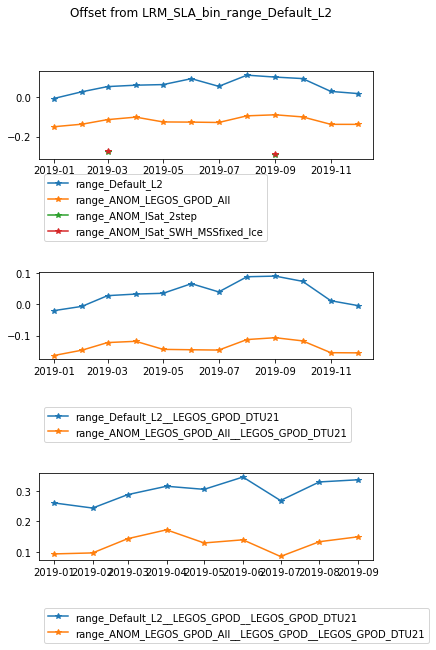

In [122]:
base = 'LRM_SLA_bin_range_Default_L2'
# base = 'LRM_SLA_bin_range_height_3'
comp_list = [[
    'SAR_O_SLA_bin_range_Default_L2',
    'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All',
     'SAR_O_SLA_bin_range_ANOM_ISat_2step',
    'SAR_O_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice',
        ],
    [
 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
#  'SAR_O_SLA_bin_range_Default_L2__ISat__LEGOS_GPOD_DTU21',
    ],
    [
 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
    ]
    ]
lab_s = 'SAR_O_SLA_bin_'
f,axes = plt.subplots(len(comp_list),1,figsize = (6,3*len(comp_list)))
f.suptitle('Offset from '+base)
for cn,comp in enumerate(comp_list):
    ax= axes[cn]
    class PGroup:
        pass
    for c in comp:
        setattr(PGroup,c,[])
    for Acl in Acl_list:
        baseline = getattr(Acl,base)
        for c in comp:
            clist = getattr(PGroup,c)
            if hasattr(Acl,c):
                comp_array = getattr(Acl,c)
                clist.append(np.nanmean(comp_array-baseline))
            else:
                clist.append(np.nan)
    for c in comp:
        clist = getattr(PGroup,c)
        ax.plot_date([Acl.date for Acl in Acl_list],
                     clist,label = c.split(lab_s)[1],
                     linestyle='solid', marker='*')
#         ax.set_ylim([-0.3,0.3])
    ax.legend(loc='lower left', bbox_to_anchor=(-0.0, -1.0))
    
f.subplots_adjust(hspace=1.3)
f.savefig(FIG_DIR+base+'_Seasonal_offsets.pdf',bbox_inches='tight')

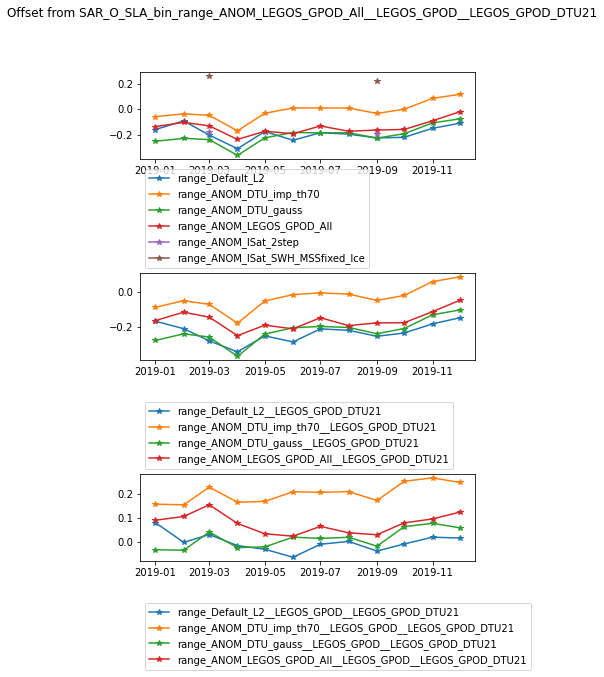

In [143]:
# base = 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21'
# base = 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All'
base = 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21'
comp_list = [[
 'SAR_L_SLA_bin_range_Default_L2',
    'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70',
 'SAR_L_SLA_bin_range_ANOM_DTU_gauss',
     'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All',
     'SAR_L_SLA_bin_range_ANOM_ISat_2step',
    'SAR_L_SLA_bin_range_ANOM_ISat_SWH_MSSfixed_Ice',
        ],
    [
'SAR_L_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_DTU_gauss__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
    ],
    [
#  'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
'SAR_L_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_DTU_gauss__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
    ],

]
lab_s = 'SAR_L_SLA_bin_'
f,axes = plt.subplots(len(comp_list),1,figsize = (6,3*len(comp_list)))
# f.suptitle(base)
f.suptitle('Offset from '+base)
for cn,comp in enumerate(comp_list):
    ax= axes[cn]
    class PGroup:
        pass
    for c in comp:
        setattr(PGroup,c,[])
    for Acl in Acl_list:
        baseline = getattr(Acl,base)
        for c in comp:
            clist = getattr(PGroup,c)
            if hasattr(Acl,c):
                comp_array = getattr(Acl,c)
                clist.append(np.nanmean(comp_array-baseline))
            else:
                clist.append(np.nan)
    for c in comp:
        clist = getattr(PGroup,c)
        ax.plot_date([Acl.date for Acl in Acl_list],
                     clist,label = c.split(lab_s)[1],
                     linestyle='solid', marker='*')
    ax.legend(loc='lower left', bbox_to_anchor=(-0.0, -1.3))
    
f.subplots_adjust(hspace=1.3)
f.savefig(FIG_DIR+base+'_Seasonal_offsets.pdf',bbox_inches='tight')

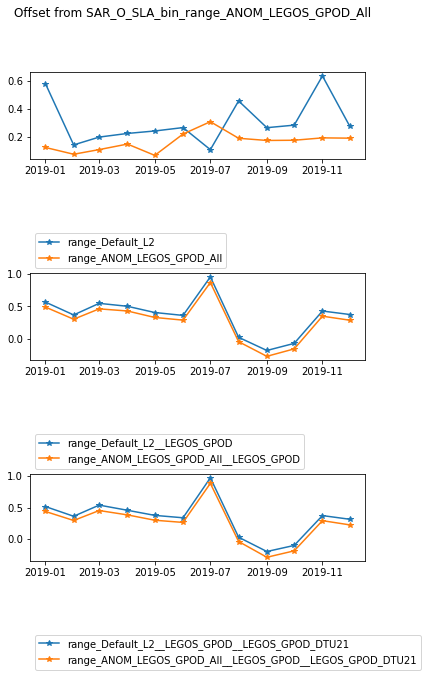

In [145]:
# base = 'SAR_O_SLA_bin_range_Default_L2'
# base = 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21'
base = 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All'
comp_list = [[
 'SARIN_SLA_bin_range_Default_L2',
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD',
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
],[
 'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD',
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
],[
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
    ]]
lab_s = 'SARIN_SLA_bin_'
f,axes = plt.subplots(len(comp_list),1,figsize = (6,3*len(comp_list)))
# f.suptitle(base)
f.suptitle('Offset from '+base)
for cn,comp in enumerate(comp_list):
    ax= axes[cn]
    class PGroup:
        pass
    for c in comp:
        setattr(PGroup,c,[])
    for Acl in Acl_list:
        baseline = getattr(Acl,base)
        for c in comp:
            clist = getattr(PGroup,c)
            if hasattr(Acl,c):
                comp_array = getattr(Acl,c)
                clist.append(np.nanmean(comp_array-baseline))
            else:
                clist.append(np.nan)
    for c in comp:
        clist = getattr(PGroup,c)
        ax.plot_date([Acl.date for Acl in Acl_list],
                     clist,label = c.split(lab_s)[1],
                     linestyle='solid', marker='*')
    ax.legend(loc='lower left', bbox_to_anchor=(-0.0, -1.3))
    
f.subplots_adjust(hspace=1.3)
f.savefig(FIG_DIR+base+'_Seasonal_offsets.pdf',bbox_inches='tight')

In [153]:
#$### map projection
m = ccrs.SouthPolarStereo()
proj_cart = ccrs.PlateCarree() 
f = plt.figure()
G= gs.grid_set(m)

ax = f.add_subplot(1,1,1,projection=m)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
G.set_grid_dxy(100e3,100e3,ax)
plt.close()


Got a grid res =  93  x  93
Note that all grid info is in nx x ny grids, whilst data is in nx x ny


/Users/h/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice


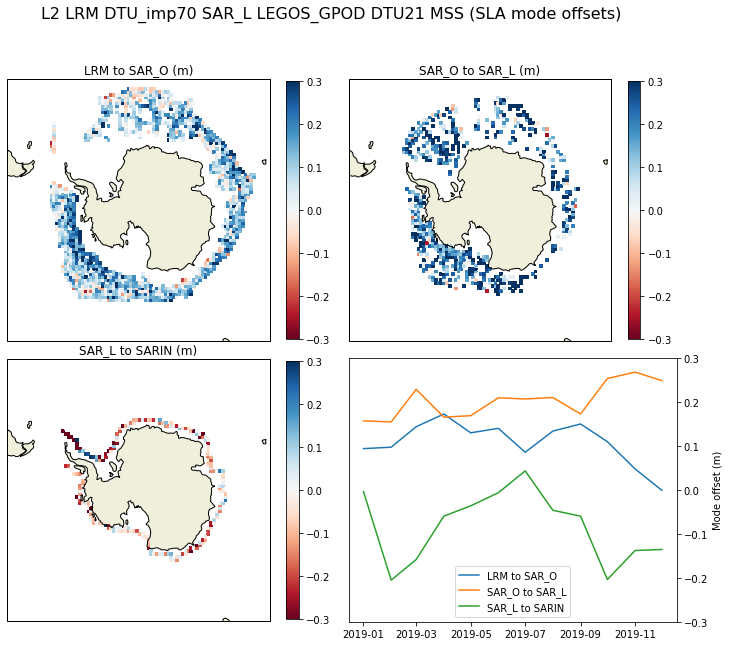

In [214]:
###Pick 4 products
LRM_SLA = 'LRM_SLA_bin_range_Default_L2'
# LRM_SLA = 'LRM_SLA_bin_range_height_3'

# SAR_O_SLA = 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21'
# SAR_L_SLA = 'SAR_L_SLA_bin_range_Default_L2'
SAR_L_SLA = 'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70__LEGOS_GPOD__LEGOS_GPOD_DTU21'
# SARIN_SLA = 'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21'

# title = 'L2  original (SLA mode offsets)'

SAR_O_SLA = 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21'
# SAR_L_SLA = 'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD'
SARIN_SLA = 'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21'
# SAR_O_SLA = 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All'
# SAR_L_SLA = 'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All'
# SARIN_SLA = 'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All'
    
title = 'L2 LRM DTU_imp70 SAR_L LEGOS_GPOD DTU21 MSS (SLA mode offsets)'

### 3 maps of offset
off1 = []
off2 = []
off3 = []
for Acl in Acl_list:
    LRM_arr = getattr(Acl,LRM_SLA)
    SAR_O_arr = getattr(Acl,SAR_O_SLA)
    SAR_L_arr = getattr(Acl,SAR_L_SLA)
    SARIN_arr = getattr(Acl,SARIN_SLA)
    off1.append(SAR_O_arr-LRM_arr)
    off2.append(SAR_L_arr-SAR_O_arr)
    off3.append(SARIN_arr-SAR_L_arr)
# off1 = np.array(off1) + 0.5
    
h_min = -0.3
h_max =  0.3

### 1 plot of offset time series
labels = ['LRM to SAR_O','SAR_O to SAR_L','SAR_L to SARIN',]
# labels = ['LRM to SAR_O (+0.5 m)','SAR_O to SAR_L','SAR_L to SARIN',]
f = plt.figure(figsize=[12,10])
f.suptitle(title,fontsize=16)
for n,(off,lbls) in enumerate(zip([off1,off2,off3],labels)):
    ax = f.add_subplot(2,2,n+1,projection=m)
    ax.set_extent([-180, 180, -90, -50], proj_cart)
    s = ax.pcolormesh(G.xpts,G.ypts,np.nanmean(off,axis=0),
                     cmap = 'RdBu',vmin = h_min,vmax = h_max)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    plt.colorbar(s,shrink=0.98,pad=0.05)
    ax.set_title(lbls+' (m)')
ax = f.add_subplot(2,2,4)
for n,off in enumerate([off1,off2,off3]):
    ax.plot([Acl.date for Acl in Acl_list],np.nanmean(off,axis=(1,2)))
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.set_ylim([-0.3,0.3])
    ax.set_ylabel('Mode offset (m)')
    ax.legend(labels)
f.subplots_adjust(wspace=0.04, hspace=0.06)
f.savefig(FIG_DIR+title.replace(' ','_')+'_maps.pdf',bbox_inches='tight')

In [11]:
Acl_list[0].SAR_L_SLA_bin_range_Default_L2_attr

{'Options_added': 'Default_L2'}

In [55]:
### make dictionary
### need: info on modes - listed in each variable attribute
### base_mode
### comp_mode
### base_name
### comp_name
### base_attr
### comp_attr
### seasonal cycle
### hist_vec
### historgram
### list of LRM modes
save_all_name = 'Mode_offsets_DTU21_MSS_LEGOS_corrections.p'
LRM_save = [
 'LRM_SLA_bin_range_Default_L2',
]
SAR_O_save = [
#  'SAR_O_SLA_bin_range_Default_L2',
#  'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
#  'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All',
#  'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
 'SAR_O_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
]
SAR_L_save = [
#  'SAR_L_SLA_bin_range_Default_L2',
#  'SAR_L_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
#  'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All',
#  'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21',
#  'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70',
#  'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70__LEGOS_GPOD_DTU21',
 'SAR_L_SLA_bin_range_ANOM_DTU_imp_th70__LEGOS_GPOD__LEGOS_GPOD_DTU21',
]
SARIN_save = [
#  'SARIN_SLA_bin_range_Default_L2',
#  'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_range_Default_L2__LEGOS_GPOD__LEGOS_GPOD_DTU21',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All',
#  'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD_DTU21',
 'SARIN_SLA_bin_range_ANOM_LEGOS_GPOD_All__LEGOS_GPOD__LEGOS_GPOD_DTU21'
]
len(LRM_save)*len(SAR_O_save)+\
len(SAR_O_save)*len(SAR_L_save)+\
len(SAR_L_save)*len(SARIN_save)\

14

In [56]:
hist_vec = np.arange(-1.0,1.01,0.01)
month_vec = np.arange(1,13,1)

In [57]:
offsets_all = []
for ls in LRM_save:
    for sos in SAR_O_save:
        off1 = []
        info = {}
        for Acl in Acl_list:
            arr1 = getattr(Acl,ls)
            arr2 = getattr(Acl,sos)
            off1.append(arr2-arr1)
        seasonal  = np.nanmean(off1,axis=(1,2))
        hist,bins = np.histogram(off1,bins=hist_vec)
        info['Base_mode'] = 'LRM'
        info['Comp_mode'] = 'SAR_O'
        info['Base_name'] = ls
        info['Comp_name'] = sos
        info['Base_info'] = getattr(Acl_list[0],ls+'_attr').copy()
        info['Comp_info'] = getattr(Acl_list[0],sos+'_attr').copy()
        info['Seasonal_cycle'] = seasonal
        info['Seasonal_months'] = month_vec
        info['Histogram'] = hist
        info['Histogram_vec_edges'] = hist_vec
        offsets_all.append(info)
        
        

In [58]:
# offsets_all = []
for ls in SAR_O_save:
    for sos in SAR_L_save:
        off1 = []
        info = {}
        for Acl in Acl_list:
            arr1 = getattr(Acl,ls)
            arr2 = getattr(Acl,sos)
            off1.append(arr2-arr1)
        seasonal  = np.nanmean(off1,axis=(1,2))
        hist,bins = np.histogram(off1,bins=hist_vec)
        info['Base_mode'] = 'SAR_O'
        info['Comp_mode'] = 'SAR_L'
        info['Base_name'] = ls
        info['Comp_name'] = sos
        info['Base_info'] = getattr(Acl_list[0],ls+'_attr').copy()
        info['Comp_info'] = getattr(Acl_list[0],sos+'_attr').copy()
        info['Seasonal_cycle'] = seasonal
        info['Seasonal_months'] = month_vec
        info['Histogram'] = hist
        info['Histogram_vec_edges'] = hist_vec
        offsets_all.append(info)
        
        

In [59]:
# offsets_all = []
for ls in SAR_L_save:
    for sos in SARIN_save:
        off1 = []
        info = {}
        for Acl in Acl_list:
            arr1 = getattr(Acl,ls)
            arr2 = getattr(Acl,sos)
            off1.append(arr2-arr1)
        seasonal  = np.nanmean(off1,axis=(1,2))
        hist,bins = np.histogram(off1,bins=hist_vec)
        info['Base_mode'] = 'SAR_L'
        info['Comp_mode'] = 'SARIN'
        info['Base_name'] = ls
        info['Comp_name'] = sos
        info['Base_info'] = getattr(Acl_list[0],ls+'_attr').copy()
        info['Comp_info'] = getattr(Acl_list[0],sos+'_attr').copy()
        info['Seasonal_cycle'] = seasonal
        info['Seasonal_months'] = month_vec
        info['Histogram'] = hist
        info['Histogram_vec_edges'] = hist_vec
        offsets_all.append(info)
        
        

In [60]:
len(offsets_all)
# offsets_all[7]

14

In [4]:
### save as pickle
import pickle as pkl
pkl.dump(offsets_all , open( save_all_name , "wb" ) )

NameError: name 'offsets_all' is not defined

In [6]:
!ls *.p

Mode_offsets_DTU21_MSS_LEGOS_corrections.p
Mode_offsets_DTU21_MSS_old_corrections.p
Mode_offsets_old_MSS_corrections.p


In [5]:
## reload the pickles
import pickle as pkl
offsets_all = pkl.load( open("Mode_offsets_DTU21_MSS_LEGOS_corrections.p", "rb") )

In [7]:
### reloaded pickle
offsets_all[7]['Base_info']

{'Options_added': 'range_1_20_ku_ANOM_LEGOS_GPOD_All atm_geo_corrections_sum_ANOM_LEGOS_GPOD mean_sea_surf_20_ku_ANOM_LEGOS_GPOD_DTU21'}